In [19]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing 

In [6]:
# Reading the data
train = pd.read_csv('C:/Users/user/Desktop/Identifying the age group/agedetectiontrain/train.csv')
test = pd.read_csv('C:/Users/user/Desktop/Identifying the age group/agedetectiontest/test.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_12740\4103020196.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('C:/Users/user/Desktop/Identifying the age group/agedetectiontrain/Train', img_name))


Age group: MIDDLE


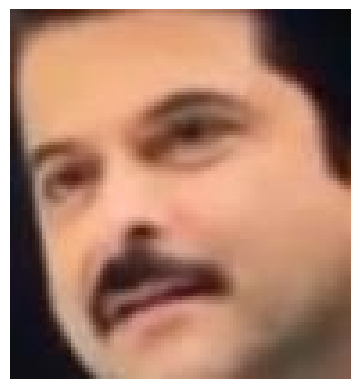

In [8]:
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('C:/Users/user/Desktop/Identifying the age group/agedetectiontrain/Train', img_name))
print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('C:/Users/user/Desktop/Identifying the age group/agedetectiontrain/Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
train_x = np.stack(temp)

C:\Users\user\AppData\Local\Temp\ipykernel_12740\80999897.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [11]:
temp = []
for img_name in test.ID:
    img_path = os.path.join('C:/Users/user/Desktop/Identifying the age group/agedetectiontest/Test', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
test_x = np.stack(temp)

C:\Users\user\AppData\Local\Temp\ipykernel_12740\3413066338.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [12]:
# Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.

In [22]:
# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = to_categorical(train_y)

In [23]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128

In [24]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [25]:
# Printing model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     1,536,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,538,003 (5.87 MB)

 Trainable params: 1,538,003 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compiling and Training Network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5509 - loss: 0.9334
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6118 - loss: 0.8381
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6052 - loss: 0.8383
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6246 - loss: 0.8145
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6275 - loss: 0.7992


In [28]:
# Training model along with validation data
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6418 - loss: 0.7920 - val_accuracy: 0.6436 - val_loss: 0.7877
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6359 - loss: 0.7917 - val_accuracy: 0.6384 - val_loss: 0.7877
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6437 - loss: 0.7812 - val_accuracy: 0.6444 - val_loss: 0.7898
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6434 - loss: 0.7821 - val_accuracy: 0.6404 - val_loss: 0.7938
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6470 - loss: 0.7814 - val_accuracy: 0.6567 - val_loss: 0.7734


Predicting and importing the result in a csv file

In [31]:
import numpy as np

pred = model.predict(test_x)
pred = np.argmax(pred, axis=1)  # Get the class with the highest probability

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [32]:
pred = lb.inverse_transform(pred)
test['Class'] = pred
test.to_csv('out.csv', index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_12740\3512860425.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


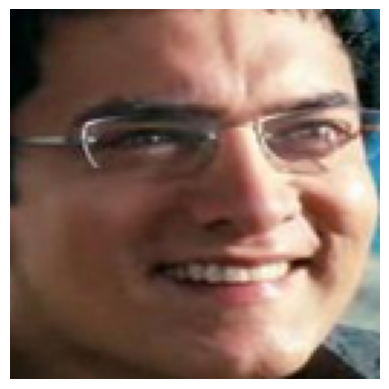

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Original: MIDDLE Predicted: ['MIDDLE']


In [39]:
idx = 2481
img_name = test.ID[idx]
img_path = os.path.join('C:/Users/user/Desktop/Identifying the age group/agedetectiontest/Test', img_name)

# Load and resize image
img = imageio.imread(img_path)
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
plt.axis('off')  # Hide axes
plt.show()

# Get predictions
pred = model.predict(test_x)
pred = np.argmax(pred, axis=1)  # Fix for predict_classes()

# Display result
print('Original:', train.Class[idx], 'Predicted:', lb.inverse_transform([pred[idx]]))